In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = "data-1739262726619.csv"
df = pd.read_csv(file_path)

# Exibir as primeiras linhas do arquivo para análise
df.head()


,ml_product_id,question,human_answer,ai_answer,model,similarity,execution_time
0,MLB4516453116,Pode aplicar com olhos abertos?,nao,"Yes, you can apply the product with your eyes ...",TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf,0.054545,0:00:09.342844
1,MLB3931565564,Composição?,"Ethyl Cyanoacrylate, PMMA, Ethoxyethyl 2-cyano...","Sure, here's a list of ingredients for our Col...",TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf,0.039130,0:00:30.073998
2,MLB4516453116,Essa cola arde,nao,Desejo enviar a cola para aqui: Cherry Lash On...,TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf,0.002755,0:00:31.391884
3,MLB4516453116,Boa tarde. Pode ser usada em técnica de olhos ...,Boa tarde! Somente uso profissional,Sure! Cherry Lash One Advance Black Glue can b...,TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf,0.076923,0:00:18.773453
4,MLB3394489059,Fiz brow lamination e o lash lifting posso usa...,Bom dia! Sim,"Yes, you can use brow lamination and lash lift...",TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf,0.031690,0:00:19.044452


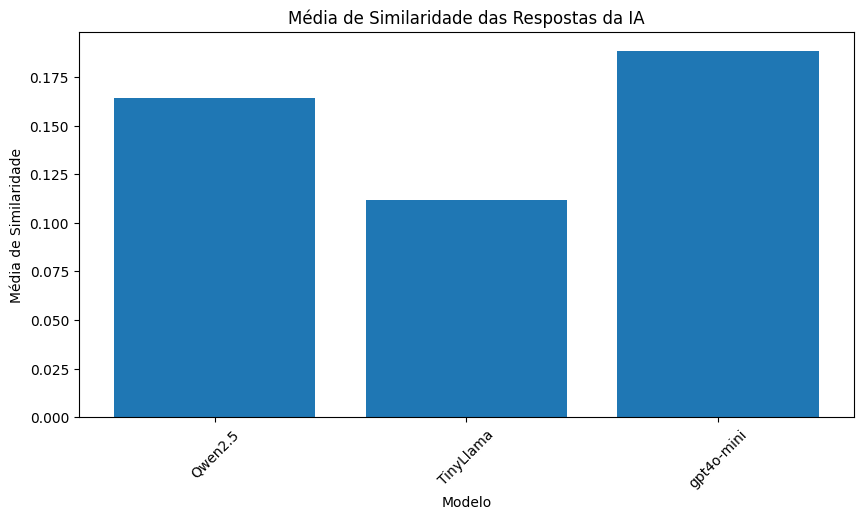

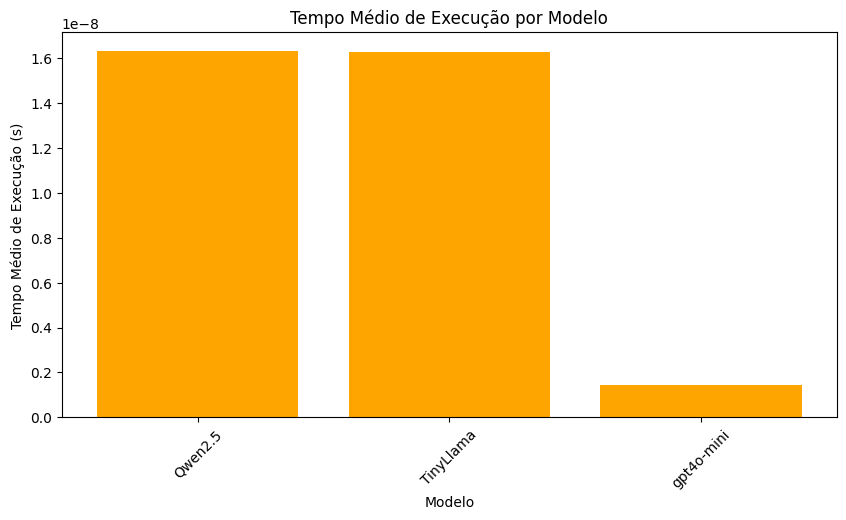

In [15]:
# Converter a coluna 'execution_time' para segundos
df["execution_time"] = pd.to_timedelta(df["execution_time"]).dt.total_seconds()

# Agrupar os dados por modelo
grouped = (
    df.groupby("model")
    .agg({"similarity": "mean", "execution_time": "mean"})
    .reset_index()
)

# Mapeamento para nomes simplificados dos modelos
model_names_mapping = {
    "TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf": "TinyLlama",
    "Qwen2.5-0.5B-Instruct-Q5_K_M.gguf": "Qwen2.5",
    "gpt-4o-mini": "gpt4o-mini",
}

# Aplicar a substituição
grouped["model"] = grouped["model"].replace(model_names_mapping)

# Gráfico 1: Média de Similaridade por Modelo
plt.figure(figsize=(10, 5))
plt.bar(grouped["model"], grouped["similarity"])
plt.xlabel("Modelo")
plt.ylabel("Média de Similaridade")
plt.title("Média de Similaridade das Respostas da IA")
plt.xticks(rotation=45)
plt.savefig("grafico_similaridade.png", dpi=300, bbox_inches="tight")
plt.show()

# Gráfico 2: Tempo Médio de Execução por Modelo
plt.figure(figsize=(10, 5))
plt.bar(grouped["model"], grouped["execution_time"], color="orange")
plt.xlabel("Modelo")
plt.ylabel("Tempo Médio de Execução (s)")
plt.title("Tempo Médio de Execução por Modelo")
plt.xticks(rotation=45)
plt.savefig("grafico_tempo_execucao.png", dpi=300, bbox_inches="tight")
plt.show()


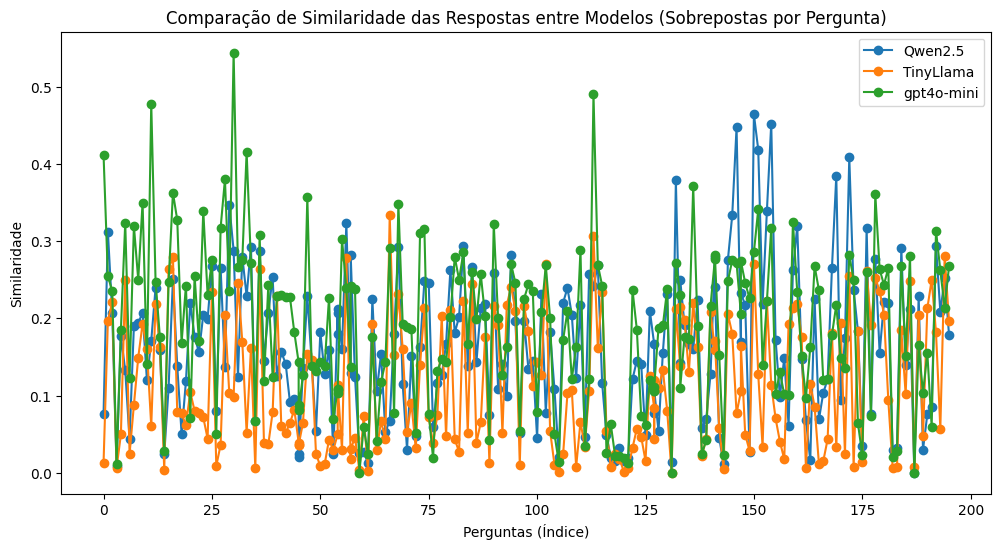

In [ ]:
# Recarregar as bibliotecas após o reset do estado
# import pandas as pd
# import matplotlib.pyplot as plt

# Recarregar o arquivo CSV
# file_path = "data-1739262726619.csv"
# df = pd.read_csv(file_path)

# Converter a coluna 'execution_time' para segundos
# df["execution_time"] = pd.to_timedelta(df["execution_time"]).dt.total_seconds()

# Mapeamento para nomes simplificados dos modelos
# model_names_mapping = {
#     "TinyLlama-1.1B-Chat-v1.0-Q4_K_M.gguf": "TinyLlama",
#     "Qwen2.5-Chat-7B-Q5_K_M.gguf": "Qwen2.5",
#     "gpt-4o-mini": "gpt4o-mini"
# }

# Aplicar a substituição dos nomes dos modelos

# Criar o gráfico de linhas para mostrar a similaridade de cada pergunta por modelo
# Criar um índice único para cada pergunta
df["question_index"] = df.groupby("question").ngroup()

# Ordenar os dados pelo índice da pergunta para manter a ordem correta
df = df.sort_values(by=["question_index", "model"])

df["model"] = df["model"].replace(model_names_mapping)
# Criar o gráfico de linhas para comparar a similaridade entre modelos sobrepostos na mesma pergunta
plt.figure(figsize=(12, 6))

# Plotar cada modelo
for model in df["model"].unique():
    subset = df[df["model"] == model]
    plt.plot(
        subset["question_index"],
        subset["similarity"],
        marker="o",
        linestyle="-",
        label=model,
    )

plt.xlabel("Perguntas (Índice)")
plt.ylabel("Similaridade")
plt.title(
    "Comparação de Similaridade das Respostas entre Modelos (Sobrepostas por Pergunta)"
)
plt.legend()
plt.savefig("grafico_compare_todos.png", dpi=300, bbox_inches="tight")
plt.show()